<a href="https://colab.research.google.com/github/yujiimt/python_ML/blob/master/python_ML/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E4%BD%9C%E3%82%8Bdeeplearning/chapter03/beginner_deeplearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 446, done.
remote: Total 446 (delta 0), reused 0 (delta 0), pack-reused 446
Receiving objects: 100% (446/446), 5.52 MiB | 3.63 MiB/s, done.
Resolving deltas: 100% (232/232), done.


In [31]:
sys.path.append('/content/deep-learning-from-scratch')

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient
sys.path.append(os.pardir)


%matplotlib inline

In [ ]:
def mse(y , t):
  input = y - t
  input_num = input ** 2
  num_data = np.sum(input_num)
  e = num_data / 2
  return e

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [ ]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
mse(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
y = [0.1, 0.05, 0.1, 0, 0.05, 0.1, 0, 0.6, 0, 0]

In [ ]:
mse(np.array(y), np.array(t))

0.5975

In [ ]:
def cee(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0, 0.1, 0, 0]

In [ ]:
cee(np.array(y), np.array(t))

0.510825457099338

In [1]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

In [2]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

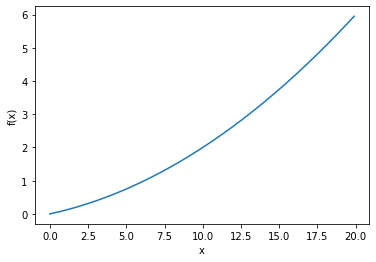

In [8]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [9]:
numerical_diff(function_1, 5)

0.1999999999990898

In [10]:
numerical_diff(function_1, 10)

0.2999999999986347

In [11]:
def function_2(x):
  return x[0]**2 + x[1] **2

In [12]:
def function_tmp1(x0):
  return x0*x0+4.0**2.0

In [13]:
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [14]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

In [15]:
numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [18]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]
    #f(x+h)の計算
    x[idx] = tmp_val + h
    fxh1 = f(x)

    #f(x-h)の計算
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2)  / (2*h)
    x[idx] = tmp_val
  return grad

In [19]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [20]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [24]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr*grad
  return x

In [22]:
def functino_2(x):
  return x[0]**2 + x[1]**2

In [25]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [26]:
#学習率が多すぎる例
init_x = np.array([-3.0, 4.0])
gradient_descent(functino_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [27]:
#学習率が小さすぎる
init_x = np.array([-3.0, 4.0])
gradient_descent(functino_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [33]:
class SimpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)
  
  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss

In [34]:
net = SimpleNet()
print(net.W)

[[-0.05208238  1.61933116  1.13361832]
 [ 0.44037406  1.04101769  0.58723519]]


In [35]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[0.36508723 1.90851461 1.20868266]


In [36]:
np.argmax(p)

1

In [37]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.2365099622904983

In [38]:
def f(W):
  return net.loss(x, t)

In [39]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.07495018  0.35081217 -0.42576235]
 [ 0.11242526  0.52621826 -0.63864352]]
